In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import ast

In [155]:
df = pd.read_csv("CleanData.csv", parse_dates=True)
df

,Ward Name,Street Name,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price
0,Phường Hòa Minh,Thanh vinh 15,108.169500,16.065700,100.0,4.0,25.000000,4,6,5.0,"['Back Expansion', 'No Residential']",150000000
1,Phường Hòa Khánh Nam,Đường Hoàng Văn Thái,108.158270,16.053888,102.0,5.0,23.000000,4,6,8.0,['1 Part Residential'],165000000
2,Phường Hòa Khánh Nam,Đường Đà Sơn,108.150700,16.058900,150.0,10.0,15.000000,4,6,6.0,"['Back Expansion', '1 Part Residential', 'No R...",250000000
3,Phường Hòa Phát,Vũ lăng,108.172516,16.028736,100.0,5.0,20.000000,4,5,6.0,"['No Residential', 'Back Expansion', '1 Part R...",250000000
4,Phường Hòa Khánh Bắc,Âu cơ,108.136940,16.077059,100.0,5.0,20.000000,4,5,4.0,"['No Residential', 'Back Expansion']",250000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3218,Phường Hòa Cường Nam,Đường Trần Đăng Ninh,108.229570,16.031054,309.0,10.0,25.000000,1,1,1.0,['Frontage'],16820000000
3219,Phường Hòa Minh,Phường Hòa Minh,108.169550,16.065733,309.0,5.0,40.470000,1,1,4.0,['1 Part Residential'],16820000000
3220,Phường Khuê Trung,Đường Đỗ Thúc Tịnh,108.211190,16.022854,81.0,4.5,20.000000,1,1,7.0,"['Frontage', 'Back Expansion']",16820000000
3221,Phường Hoà Quý,phạm đình bân,108.233420,15.982958,100.0,5.0,20.000000,2,1,5.0,['No Residential'],16820000000


In [156]:
def convert_to_list(value):
    if isinstance(value, str): 
        try:
            return ast.literal_eval(value)  
        except:
            return [value.strip()]  
    elif isinstance(value, list):
        return value 
    else:
        return [] 

### One-hot encoding 

In [157]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_columns = encoder.fit_transform(df[["Ward Name", "Street Name"]])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(["Ward Name", "Street Name"]))

df_final = df.drop(columns=["Ward Name", "Street Name"]).join(encoded_df)

df_final.head()


,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Property Features,Price,...,Street Name_Đỗ Chính,Street Name_Đỗ Phát,Street Name_đinh gia trinh,Street Name_điện ngọc,Street Name_đường 1 thôn Phước Hưng,Street Name_đường 5,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5
0,108.169500,16.065700,100.0,4.0,25.0,4,6,5.0,"['Back Expansion', 'No Residential']",150000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,['1 Part Residential'],165000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108.150700,16.058900,150.0,10.0,15.0,4,6,6.0,"['Back Expansion', '1 Part Residential', 'No R...",250000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,"['No Residential', 'Back Expansion', '1 Part R...",250000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,"['No Residential', 'Back Expansion']",250000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df["Property Features"] = df["Property Features"].apply(convert_to_list)
mlb = MultiLabelBinarizer()

features_encoded = mlb.fit_transform(df["Property Features"])

df_features = pd.DataFrame(features_encoded, columns=mlb.classes_)
df = df.drop(columns=["Property Features"]).reset_index(drop=True)
df_final = df_final.drop(columns=["Property Features"]).reset_index(drop=True)
df = pd.concat([df_final, df_features], axis=1)


df.head()

,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,108.169500,16.065700,100.0,4.0,25.0,4,6,5.0,150000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,108.158270,16.053888,102.0,5.0,23.0,4,6,8.0,165000000,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,108.150700,16.058900,150.0,10.0,15.0,4,6,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,108.172516,16.028736,100.0,5.0,20.0,4,5,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,108.136940,16.077059,100.0,5.0,20.0,4,5,4.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


## Feature Transformation

### Normalize by taking the inverse method

In [160]:
columns_to_inverse = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_inverse_transformed = df.copy() 
df_inverse_transformed[columns_to_inverse] = 1 / df_inverse_transformed[columns_to_inverse]
df_inverse_transformed[columns_to_inverse].head()

,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,0.009245,0.062244,0.010000,0.25,0.040000
1,0.009246,0.062290,0.009804,0.20,0.043478
2,0.009246,0.062271,0.006667,0.10,0.066667
3,0.009244,0.062388,0.010000,0.20,0.050000
4,0.009248,0.062200,0.010000,0.20,0.050000


### Normalize using Arcsine method

In [161]:
columns_to_asinh = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_asinh_transformed = df.copy()
df_asinh_transformed[columns_to_asinh] = np.arcsinh(df_asinh_transformed[columns_to_asinh])
df_asinh_transformed[columns_to_asinh].head()

,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,5.376868,3.470801,5.298342,2.094713,3.912423
1,5.376764,3.470067,5.318144,2.312438,3.829114
2,5.376694,3.470378,5.703794,2.998223,3.402307
3,5.376896,3.468502,5.298342,2.312438,3.689504
4,5.376567,3.471506,5.298342,2.312438,3.689504


### Normalization using Z-score method

In [162]:
columns_to_zScore = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
std_scaler_zScore = StandardScaler()
df_std_scaled_zScore = std_scaler_zScore.fit_transform(df[columns_to_zScore])
df_std_scaled_zScore = pd.DataFrame(df_std_scaled_zScore, columns=columns_to_zScore)
df_std_scaled_zScore[columns_to_zScore].head()

,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,-0.656839,0.866929,-0.405024,-1.078667,0.736588
1,-0.875574,0.574112,-0.373798,-0.513118,0.407946
2,-1.023021,0.698358,0.375624,2.314626,-0.906622
3,-0.598094,-0.049402,-0.405024,-0.513118,-0.085017
4,-1.291034,1.148517,-0.405024,-0.513118,-0.085017


### Normalize using Logarithmic method

In [163]:
columns_to_log = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_log_transformed = df.copy()
df_log_transformed = df[columns_to_log].apply(np.log1p)
df_log_transformed = pd.DataFrame(df_log_transformed, columns=columns_to_log)
df_log_transformed[columns_to_log].head()

,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,4.692902,2.837071,4.615121,1.609438,3.258097
1,4.692799,2.836378,4.634729,1.791759,3.178054
2,4.692729,2.836672,5.017280,2.397895,2.772589
3,4.692929,2.834902,4.615121,1.791759,3.044522
4,4.692603,2.837736,4.615121,1.791759,3.044522


### Normalize using square root method

In [164]:
columns_to_sqrt = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]
df_sqrt_transformed = df.copy()
df_sqrt_transformed = df[columns_to_sqrt].apply(np.sqrt)
df_sqrt_transformed = pd.DataFrame(df_sqrt_transformed, columns=columns_to_sqrt)
df_sqrt_transformed[columns_to_sqrt].head()

,Longitude,Latitude,Area (m²),Width (m),Length (m)
0,10.400457,4.008204,10.000000,2.000000,5.000000
1,10.399917,4.006730,10.099505,2.236068,4.795832
2,10.399553,4.007356,12.247449,3.162278,3.872983
3,10.400602,4.003590,10.000000,2.236068,4.472136
4,10.398891,4.009621,10.000000,2.236068,4.472136


### Data verification

*Histogram comparing the variable Area (m²) before and after normalization*

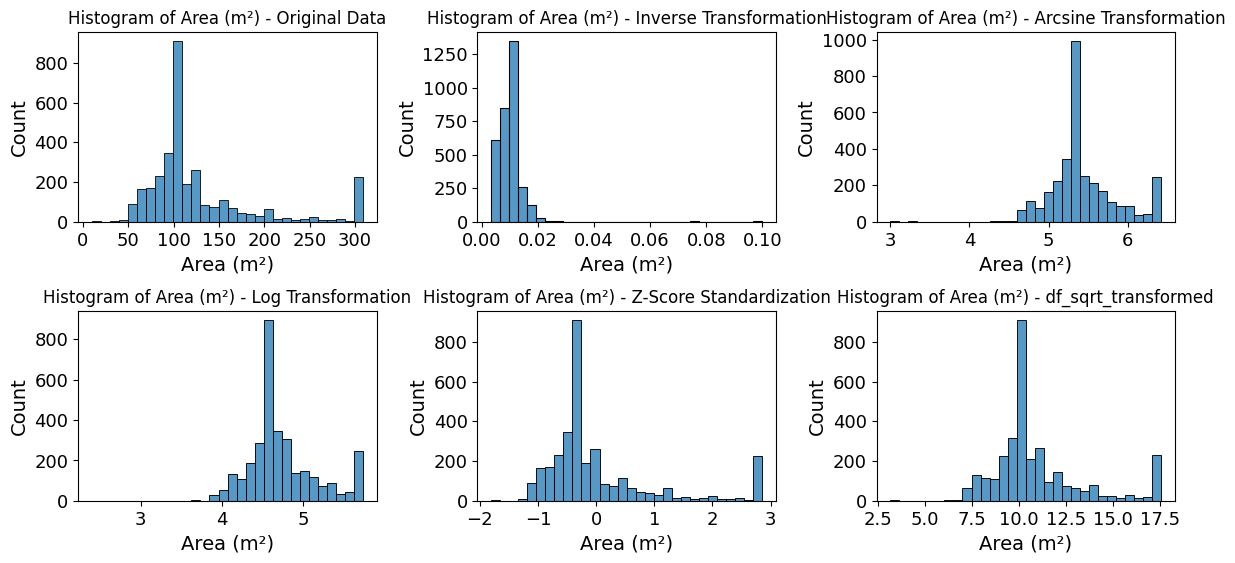

In [165]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']
plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    sns.histplot(data=data['Area (m²)'], bins=30)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('Area (m²)', fontsize = 14)
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.title(f'Histogram of Area (m²) - {method}')
    plt.tight_layout()

plt.show()

*Use probability graph to verify whether the transformed data follows the normal distribution*

- Comparison of the distribution of the *Area (m²)* feature when applying normalization methods

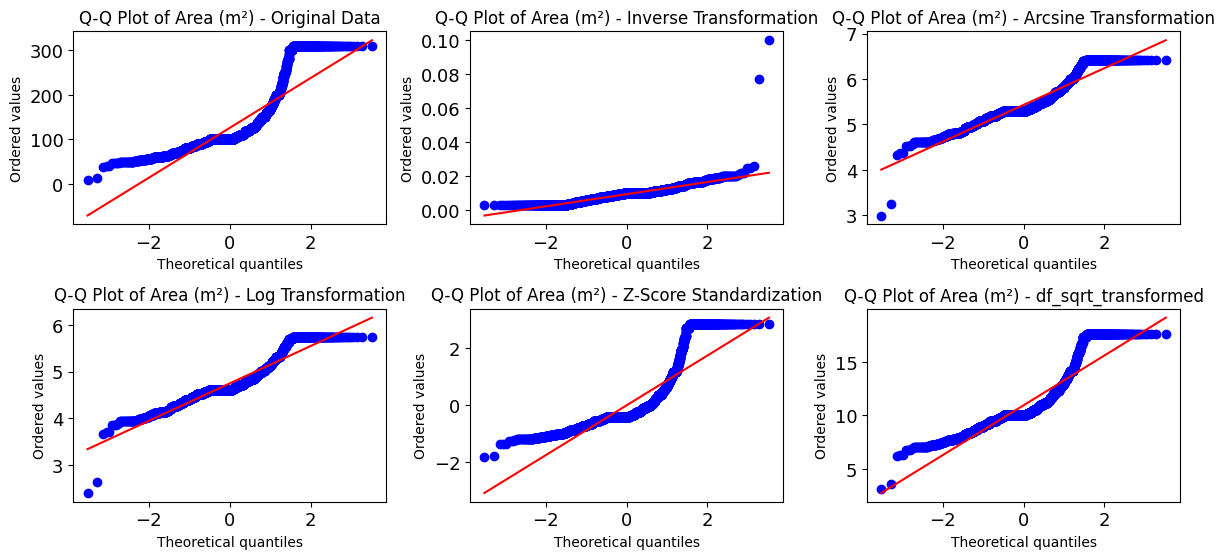

In [166]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Area (m²)'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Area (m²) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Width (m)* feature when applying normalization methods

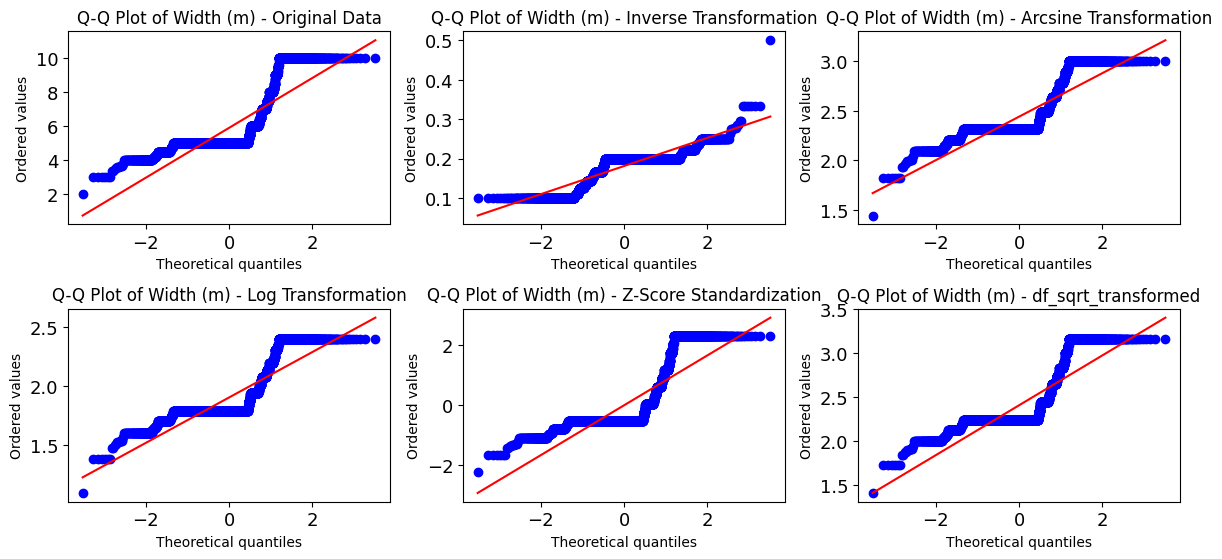

In [167]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'df_sqrt_transformed']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Width (m)'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Width (m) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Longitude* feature when applying normalization methods

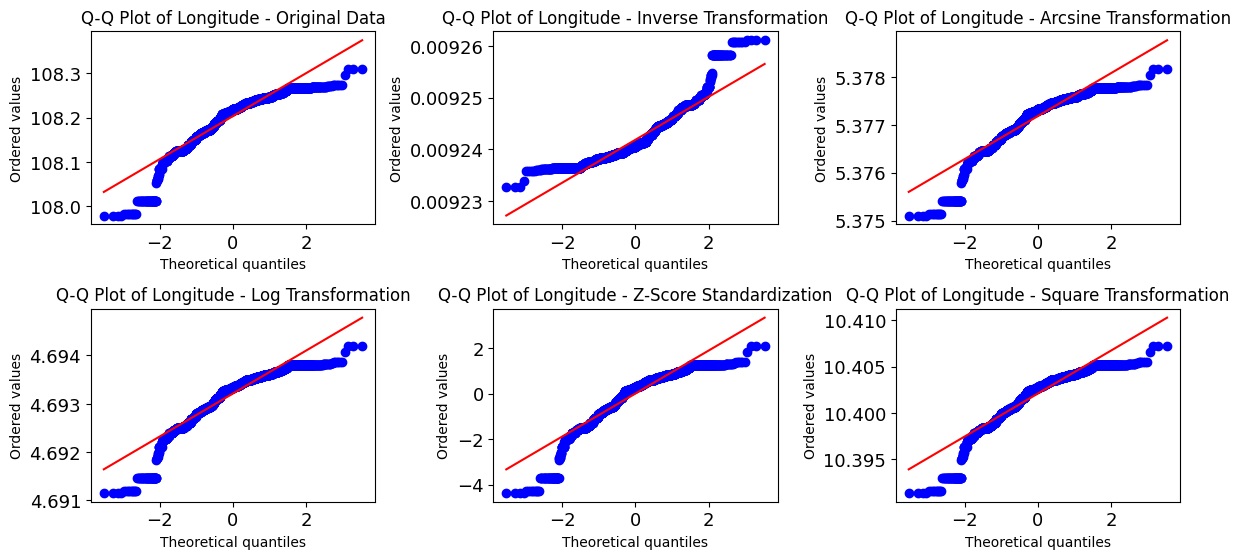

In [168]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Longitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Longitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Comparison of the distribution of the *Latitude* feature when applying normalization methods

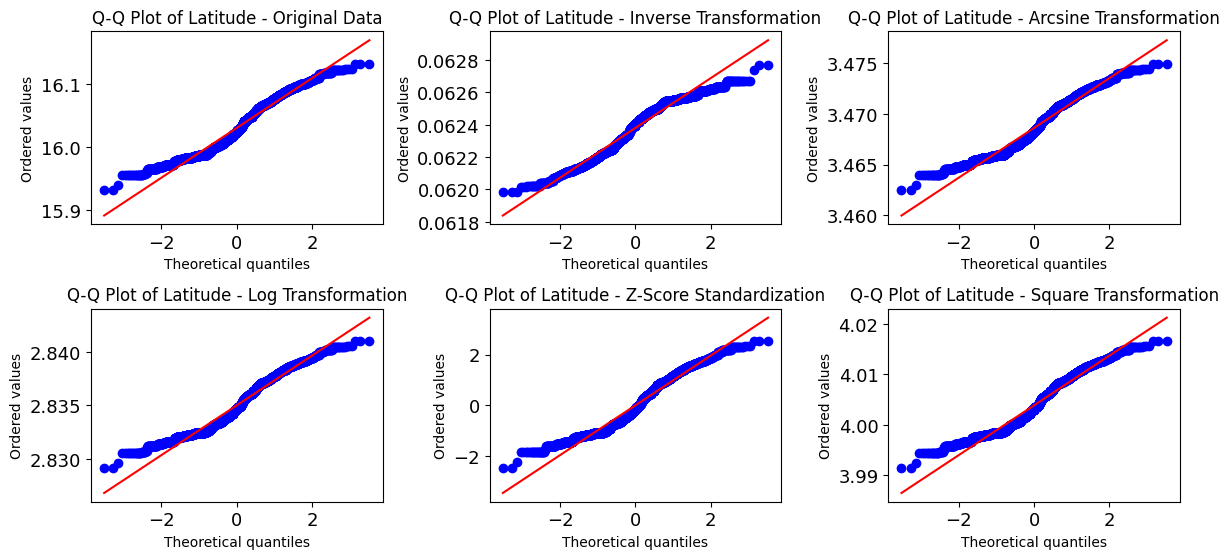

In [169]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data['Latitude'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Latitude - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

*The characteristic that follows the most normal distribution is standardized by the square root method.*

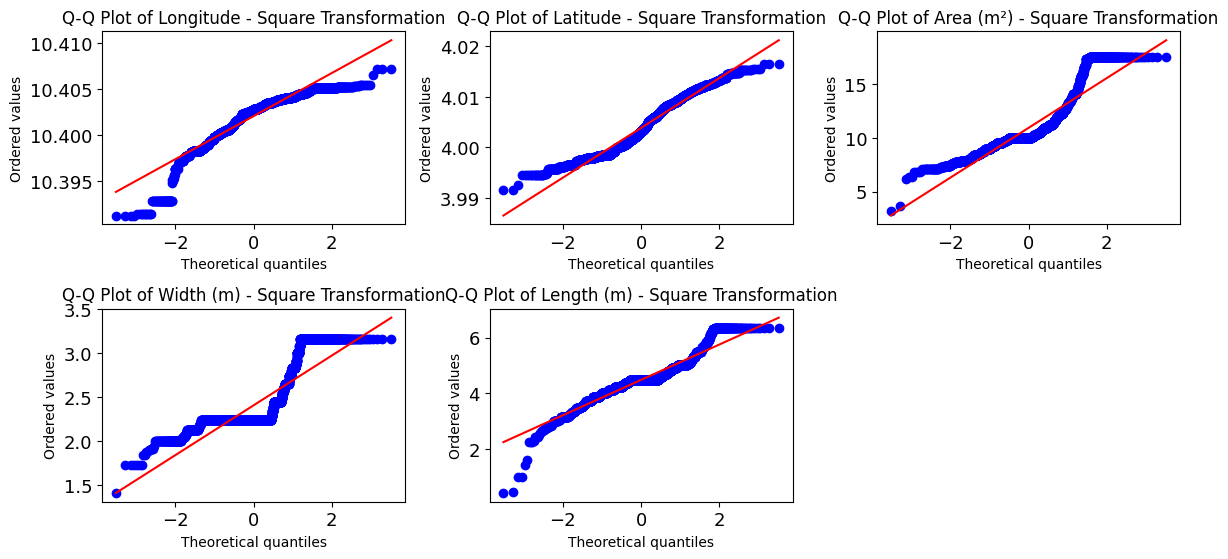

In [170]:
cols = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    stats.probplot(df_sqrt_transformed[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col} - Square Transformation")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

- Compares distribution of characteristics *Length (m)* when applying standardized methods

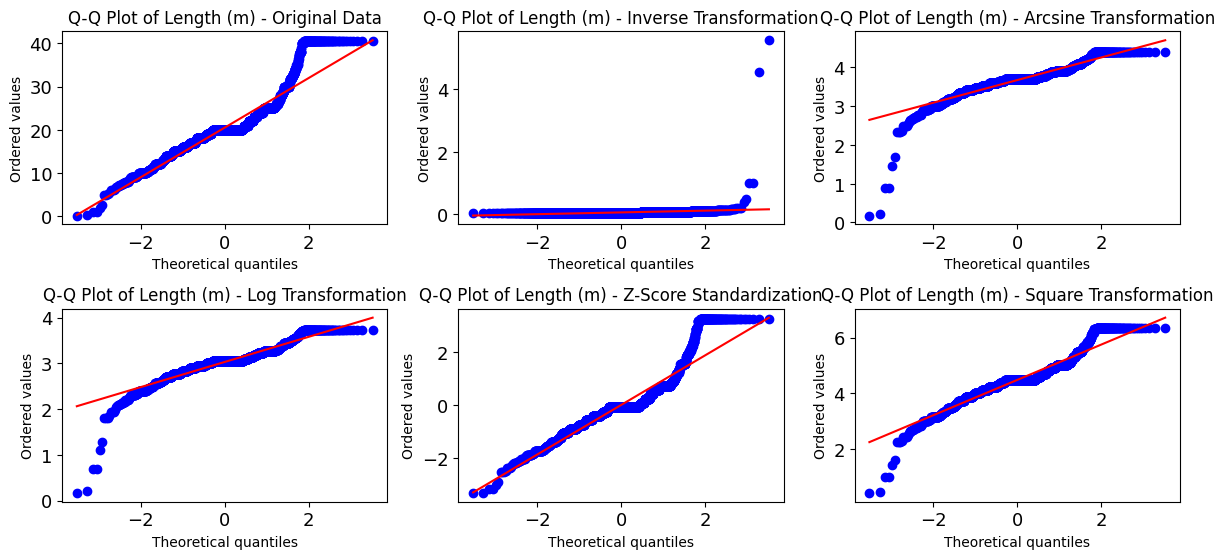

In [171]:
dfs = [df, df_inverse_transformed, df_asinh_transformed, df_log_transformed, df_std_scaled_zScore, df_sqrt_transformed]
methods = ["Original Data", "Inverse Transformation", 'Arcsine Transformation', 'Log Transformation', 'Z-Score Standardization', 'Square Transformation']

plt.figure(figsize=(12, 8))
for i, (data, method) in enumerate(zip(dfs, methods), 1):
    plt.subplot(3, 3, i) 
    stats.probplot(data["Length (m)"], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Length (m) - {method}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

=> Select Z-Score normalization method for feature *Length (m)* and square root method for features *Longitude", Latitude, Area (m²), Width (m)*

In [172]:
df_final = df.copy()

df_final["Length (m)"] = df_std_scaled_zScore["Length (m)"]

columns_sqrt = ["Longitude", "Latitude", "Area (m²)", "Width (m)"]
df_final[columns_sqrt] = df_sqrt_transformed[columns_sqrt]

df_final.head()


,Longitude,Latitude,Area (m²),Width (m),Length (m),Land Type,Legal Status,House Direction,Price,Ward Name_Phường An Hải Bắc,...,Street Name_đường 7m5 - Khu E Kim Long,Street Name_đường golden Hills,Street Name_đường khue đông,Street Name_đường số 5,1 Part Residential,All Residential,Back Expansion,Car Alley,Frontage,No Residential
0,10.400457,4.008204,10.000000,2.000000,0.736588,4,6,5.0,150000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1
1,10.399917,4.006730,10.099505,2.236068,0.407946,4,6,8.0,165000000,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
2,10.399553,4.007356,12.247449,3.162278,-0.906622,4,6,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
3,10.400602,4.003590,10.000000,2.236068,-0.085017,4,5,6.0,250000000,0.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
4,10.398891,4.009621,10.000000,2.236068,-0.085017,4,5,4.0,250000000,0.0,...,0.0,0.0,0.0,0.0,0,0,1,0,0,1


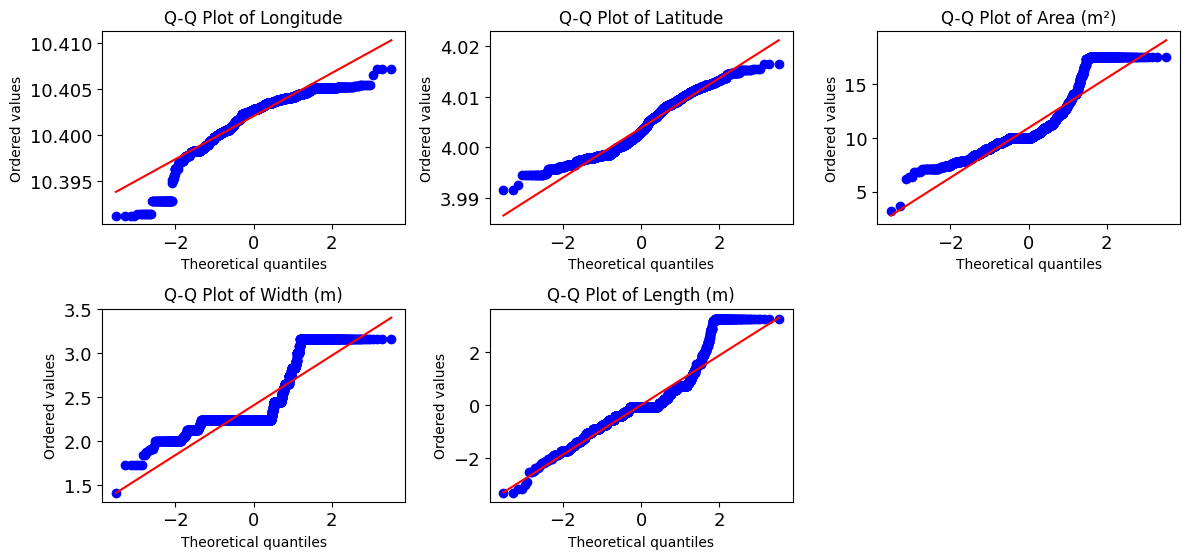

In [173]:
cols = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) 
    stats.probplot(df_final[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.xlabel("Theoretical quantiles")
    plt.ylabel("Ordered values")
    plt.xticks(fontsize=13)  
    plt.yticks(fontsize=13) 
    plt.tight_layout()

plt.show()

In [174]:
df_final.to_csv('TransformedData.csv', index=False)
print("Đã xuất DataFrame ra file CSV.")

Đã xuất DataFrame ra file CSV.
